# **Data Understanding**

---

## **Prepare Environment**

<br/>

### Imports

In [3]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Other
import configparser
import subprocess
import warnings
import pprint
import time
import os

<br/>

### Prepare Principal Directory

In [4]:
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'
    
    return f'Current working directory: {curr_dir}'

In [5]:
path_to_work('notebooks')

'Change directory to: /home/campos/projects/data-analysis-of-spending-by-brazilian-senators/notebooks'

<br/>

### Set Config

In [6]:
# Visualization inside the jupyter
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

<br/>

### Load Data

In [7]:
df = pd.read_csv('data/cleansing/dados_limpos_ceaps_cleansing.csv',
                 encoding='utf-8',
                 delimiter=',',
                 verbose=True)

Tokenization took: 19.42 ms
Type conversion took: 13.45 ms
Parser memory cleanup took: 0.01 ms


In [8]:
dict_map_senadores = dict(pd.read_csv('data/cleansing/map_senadores.csv',
                          encoding='utf-8',
                          delimiter=',',
                          verbose=True))

Tokenization took: 0.04 ms
Type conversion took: 0.16 ms
Parser memory cleanup took: 0.00 ms


In [9]:
type(dict_map_senadores)

dict

In [10]:
# Primeiras linhas do dataset
df.head()

,DIA,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO
0,1.00,1,1,Aluguel,19,19,01/2021,Despesa com pagamento de aluguel de imóvel par...,1000.00
1,1.00,1,1,Aluguel,22,22,001/21,Despesa com aluguel de imóvel para uso do escr...,6000.00
2,1.00,1,1,Divulgação,23,23,44,Divulgação da atividade parlamentar,6000.00
3,21.00,1,1,Aluguel,1795,529,023.489.627,Pagamento de energia elétrica para uso do escr...,75.29
4,21.00,1,1,Passagens,22,22,VVEWKR,"Companhia Aérea: LATAM, Localizador: VVEWKR. P...",1486.46


### Seleção condicional onde pegamos todos as linhas cujo o valor reembolsado é R$ 0,01

In [11]:
df[df['VALOR_REEMBOLSADO'] == 0.01]

,DIA,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO
1394,27.00,9,7,Passagens,2428,2575,YYMQTR,"Companhia Aérea: AZUL, Localizador: YYMQTR. Pa...",0.01
1427,11.00,11,7,Passagens,2428,2575,QDNNXV,"Companhia Aérea: AZUL, Localizador: QDNNXV. Pa...",0.01
1449,26.00,11,7,Passagens,2428,2575,YWR3JE,"Companhia Aérea: AZUL, Localizador: YWR3JE. Pa...",0.01
3062,21.00,10,15,Passagens,2430,563,HACROG,"Companhia Aérea: GOL, Localizador: HACROG. Pas...",0.01


---



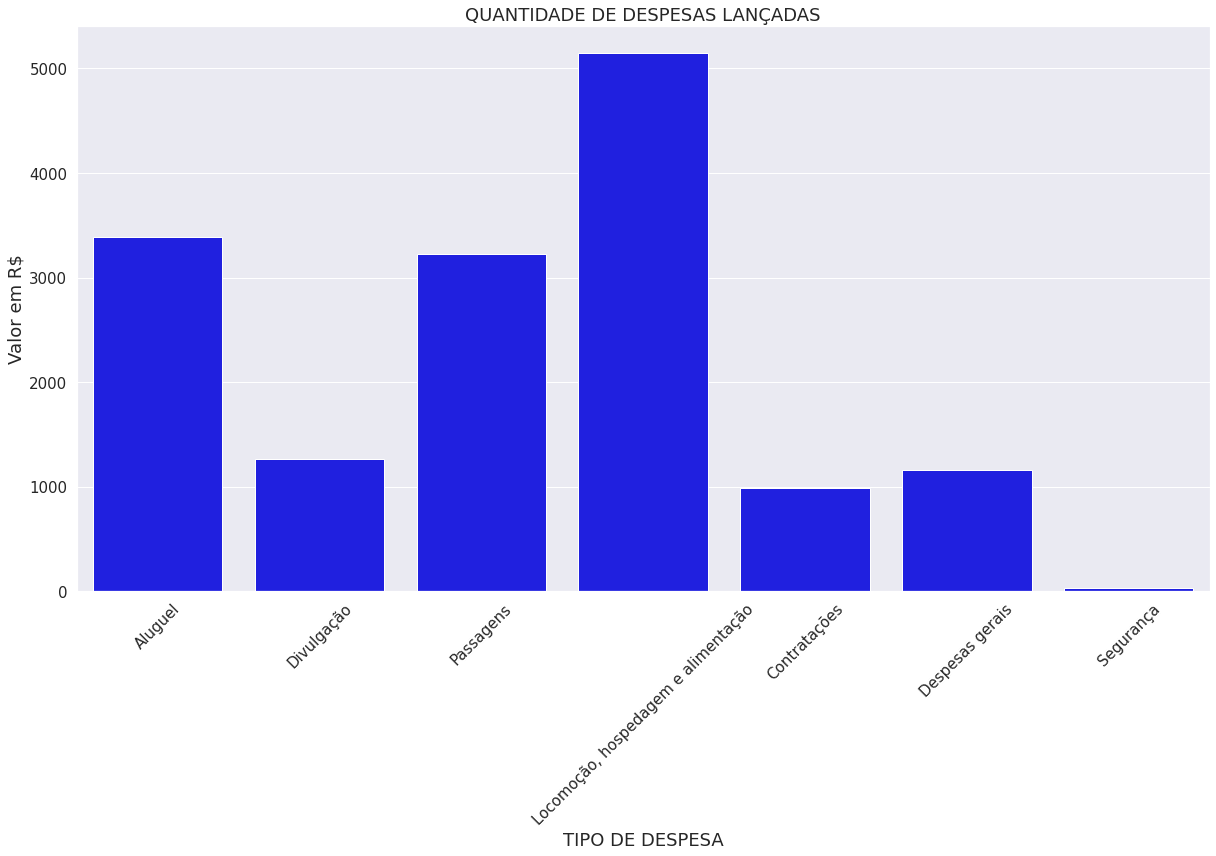

In [12]:
plot_tipo_despesa = sns.countplot(data=df, 
                                  x='TIPO_DESPESA',
                                  color='blue')

plt.title('QUANTIDADE DE DESPESAS LANÇADAS')
plt.xlabel('TIPO DE DESPESA')
plt.ylabel('Valor em R$')
plt.xticks(rotation=45);

<br/>

### Check Values by `SENADOR`

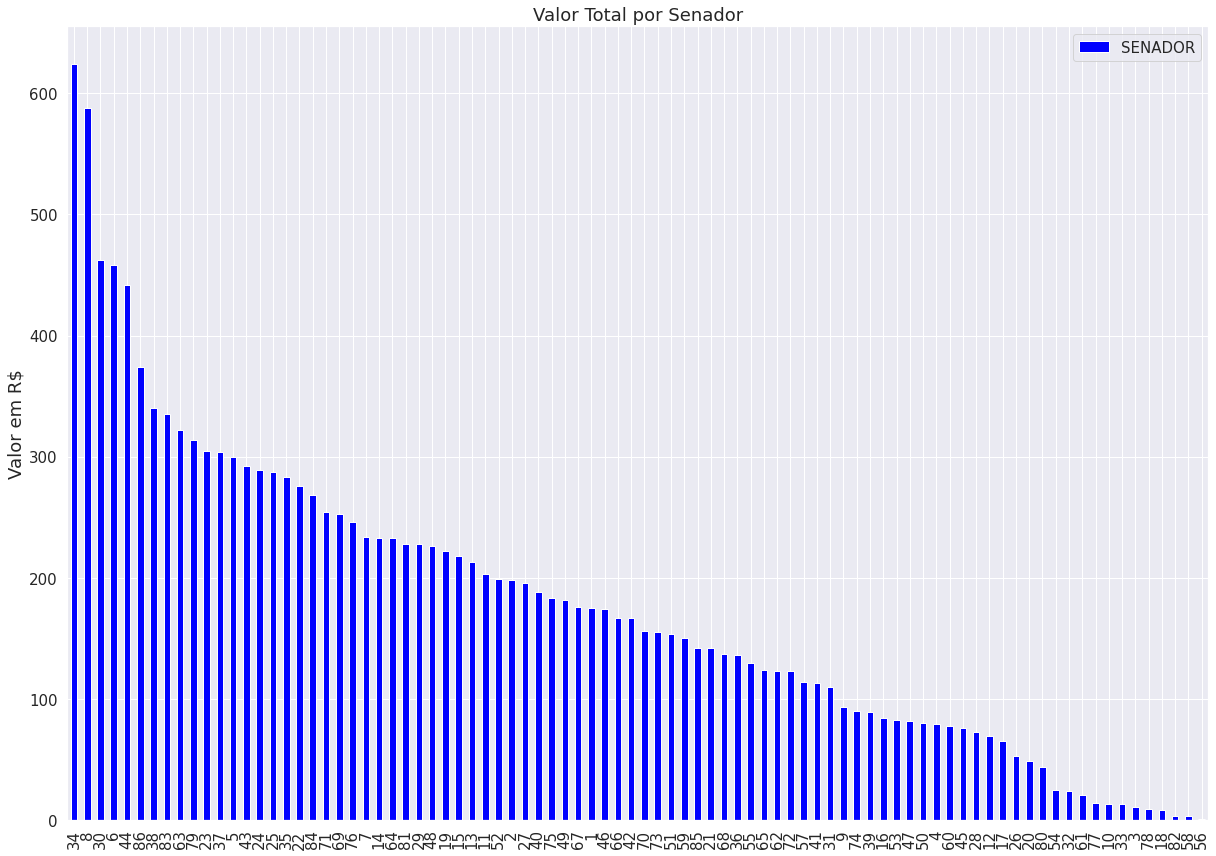

In [13]:
df['SENADOR'].value_counts().plot(kind='bar', color='blue')
plt.xticks(rotation=90)
plt.title("Valor Total por Senador")
plt.ylabel('Valor em R$')
plt.legend()

plt.show()

<br/>

### Top Values Received

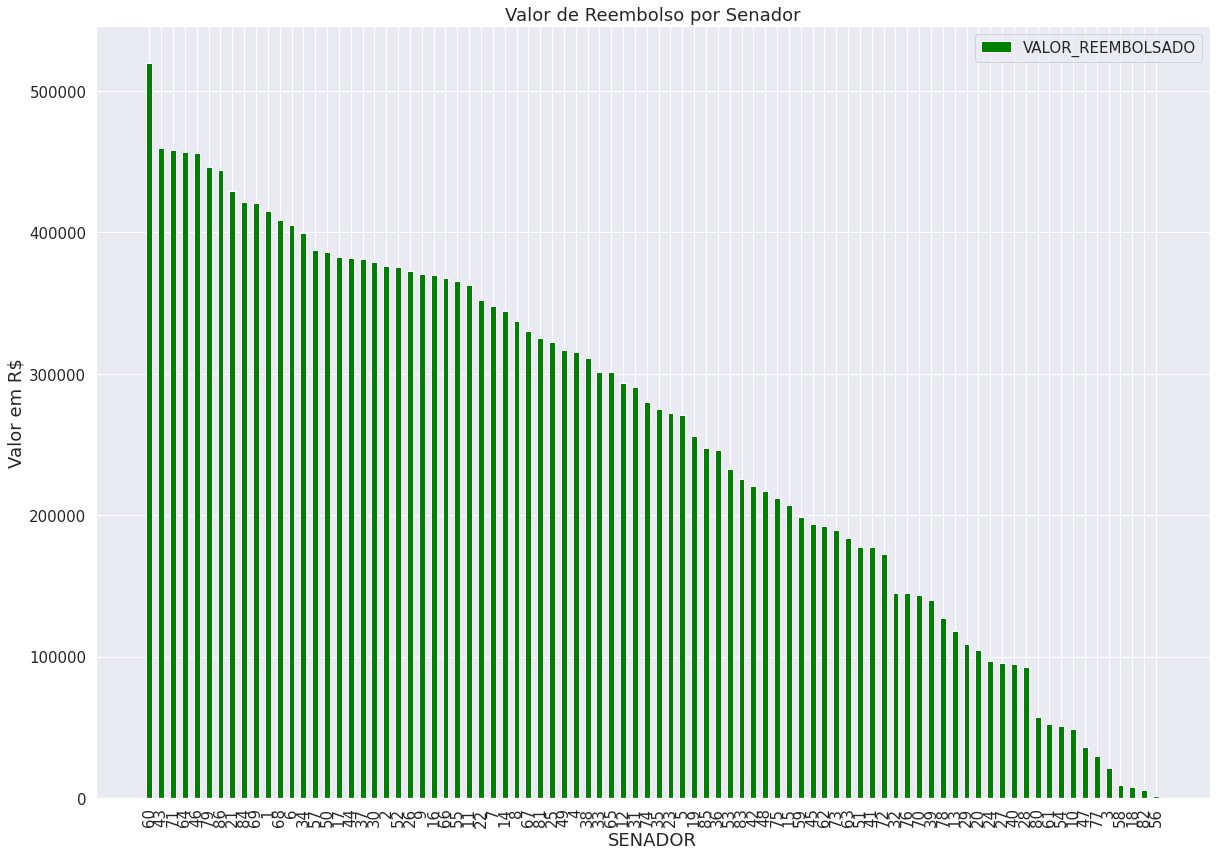

In [14]:
valores_senadores = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)
valores_senadores.plot(kind='bar', color='green')
plt.xticks(rotation=90)
plt.title("Valor de Reembolso por Senador")
plt.ylabel('Valor em R$')
plt.legend()
plt.autoscale()

plt.show()

### Verificando o quanto que foi pedido de reembolso durante cada mês

In [15]:
gastos_por_mes = df.pivot_table(index='MES', values='VALOR_REEMBOLSADO', aggfunc=np.sum)
display(gastos_por_mes)

,VALOR_REEMBOLSADO
MES,
1,1459445.81
2,1699285.25
3,1767950.99
4,1715793.30
5,2001578.14
6,2092308.80
7,2035848.55
8,2513275.92
9,2243385.39


In [16]:
gastos_por_mes = df.pivot_table(index='MES', values='VALOR_REEMBOLSADO', aggfunc=np.sum)

gastos_por_mes = gastos_por_mes.rename(index={1:"janeiro",
                                              2:"fevereiro",
                                              3:"março",
                                              4:"abril",
                                              5:"maio",
                                              6:"junho",
                                              7:"julho",
                                              8:"agosto",
                                              9:"setembro",
                                              10:"outubro",
                                              11:"novembro",
                                              12:"dezembro"})

In [17]:
display(gastos_por_mes)

,VALOR_REEMBOLSADO
MES,
janeiro,1459445.81
fevereiro,1699285.25
março,1767950.99
abril,1715793.30
maio,2001578.14
junho,2092308.80
julho,2035848.55
agosto,2513275.92
setembro,2243385.39


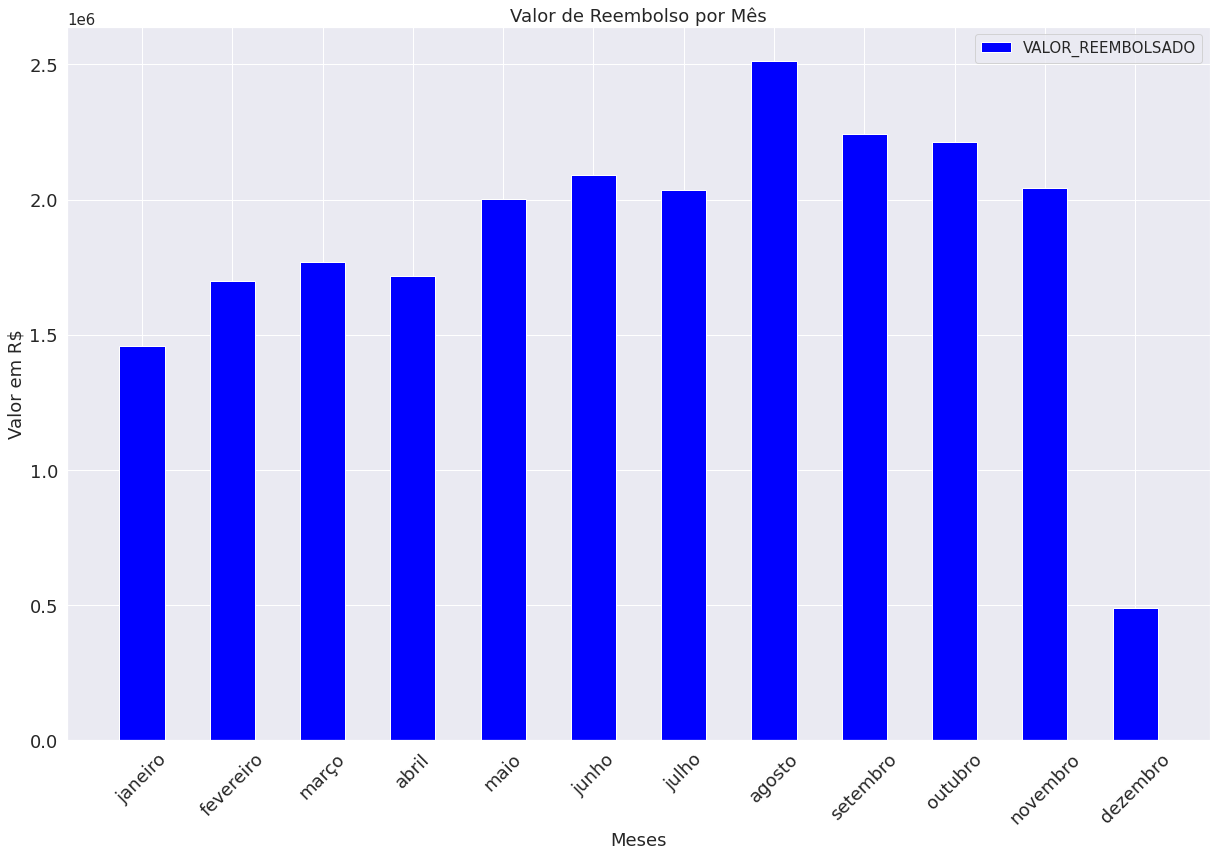

In [18]:
gastos_por_mes.plot(kind='bar', color='blue', fontsize=18)

# visualização do gráfico
plt.ylabel('Valor em R$')
plt.xlabel('Meses')
plt.title("Valor de Reembolso por Mês")
plt.legend(loc="upper right")
plt.legend()
plt.xticks(rotation=45)
plt.autoscale()

plt.show()

### Verificando a média e mediana dos valores reembolsados

In [19]:
#Geração dos dados para o mapa de calor
#Criando uma Pivot Table
mapa_de_calor = df.pivot_table(index='MES', values='VALOR_REEMBOLSADO', columns='TIPO_DESPESA', aggfunc=np.sum)

mapa_de_calor = mapa_de_calor.rename(index={1:"janeiro",
                                              2:"fevereiro",
                                              3:"março",
                                              4:"abril",
                                              5:"maio",
                                              6:"junho",
                                              7:"julho",
                                              8:"agosto",
                                              9:"setembro",
                                              10:"outubro",
                                              11:"novembro",
                                              12:"dezembro"})

mapa_de_calor.head()

TIPO_DESPESA,Aluguel,Contratações,Despesas gerais,Divulgação,"Locomoção, hospedagem e alimentação",Passagens,Segurança
MES,,,,,,,
janeiro,320571.17,318776.06,79094.06,239354.32,288488.18,211130.57,2031.45
fevereiro,348782.72,447339.24,78275.59,241526.24,271235.56,309279.83,2846.07
março,336576.95,451722.63,70666.28,352138.27,368241.63,185990.61,2614.62
abril,333019.55,442832.84,89454.71,269125.03,337226.99,233308.11,10826.07
maio,337724.49,505431.01,82065.84,247068.81,375068.06,452188.48,2031.45


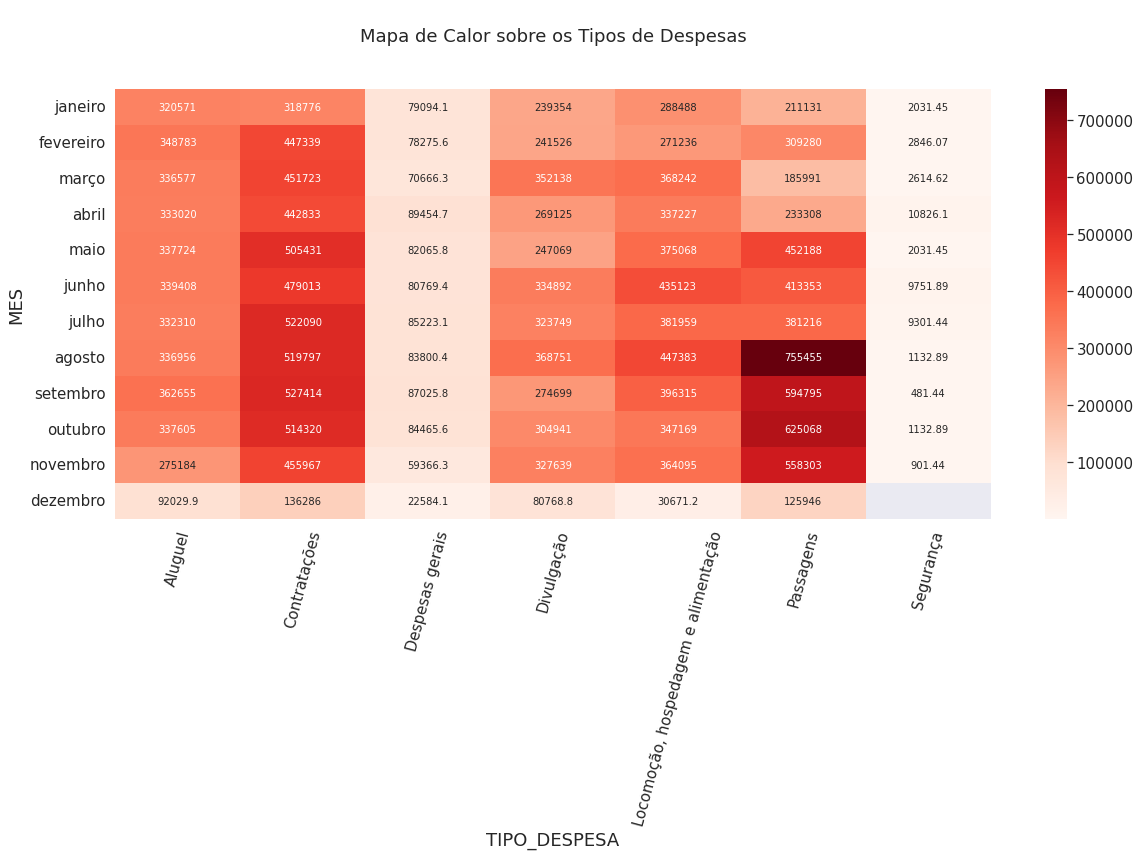

In [20]:
#Gerando o mapa de calor
sns.heatmap(mapa_de_calor, annot=True, fmt='g', cmap='Reds')

plt.title("\nMapa de Calor sobre os Tipos de Despesas\n\n")
plt.xticks(rotation=75)
plt.yticks(rotation=0)
plt.autoscale()
plt.show()

---